<a href="https://colab.research.google.com/github/Rahul07-hub274/first_project1/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formula 1 Constructor Performance Analysis and Win Prediction

###  Problem Statement:
In Formula 1 racing, understanding the factors that contribute to a constructor's (team's) performance is crucial for strategic decision-making and improving competitiveness. This project aims to analyze historical constructor standings data to identify key performance indicators and develop a predictive model to forecast whether a constructor will achieve a race win based on race characteristics and standings.

### Project Goals:

###Data Analysis:

Identify the main factors influencing constructor performance (e.g., points scored, position).

Analyze the relationship between different features (race ID, constructor ID, points, position, wins).

Visualize trends and patterns in the data to gain insights into constructor performance over time.

###Win Prediction:

Build a classification model to predict whether a constructor will win a race based on a given set of features.

Evaluate the model's performance using appropriate metrics (accuracy, precision, recall, F1-score).

## IMPORTING ALL NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix


## 1. Data Loading and Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rahul_Singh_2024UEE4165/dataset/data set/constructor_standings.csv')

In [ ]:
# Display basic information about the dataset
print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDescriptive Statistics:\n", df.describe())

First 5 rows:
    constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13271 entries, 0 to 13270
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  13271 non-null  int64  
 1   raceId                  13271 non-null  int64  
 2   constructorId           13271 non-null  int64  
 3   points                  13271 non-null  float64


## 2. Data Cleaning and Preprocessing

In [ ]:
# Check for missing values and handle them (none observed in this dataset)
# Convert categorical features to numerical if necessary (none observed here)
# Feature Scaling (for numerical columns)
scaler = StandardScaler()
df[['points', 'position', 'wins']] = scaler.fit_transform(df[['points', 'position', 'wins']])

In [ ]:
# Define features (X) and target variable (y)
# For regression, we will predict 'points'
# For classification, we will predict whether a constructor has wins (1) or not (0)
X = df[['raceId', 'constructorId', 'position']]  # Features
y_regression = df['points']  # Target for regression
y_classification = df['wins']  # Target for classification

In [ ]:
# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

## 3. Exploratory Data Analysis (EDA)

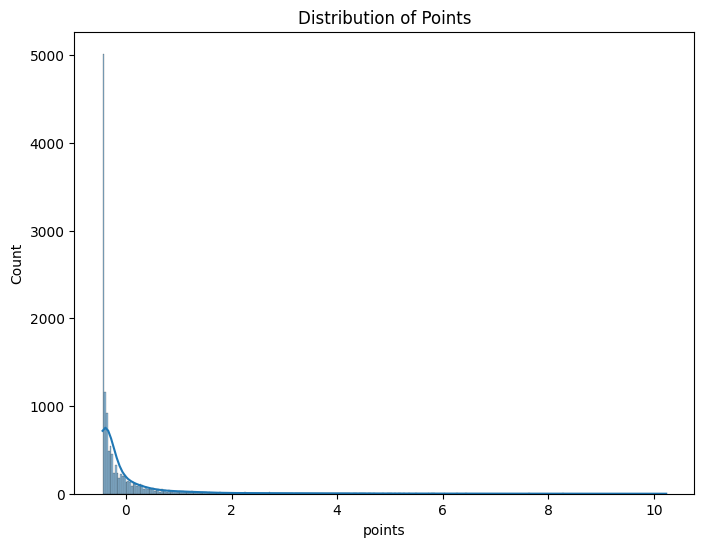

In [ ]:
# Distribution of points
plt.figure(figsize=(8, 6))
sns.histplot(df['points'], kde=True)
plt.title('Distribution of Points')
plt.show()

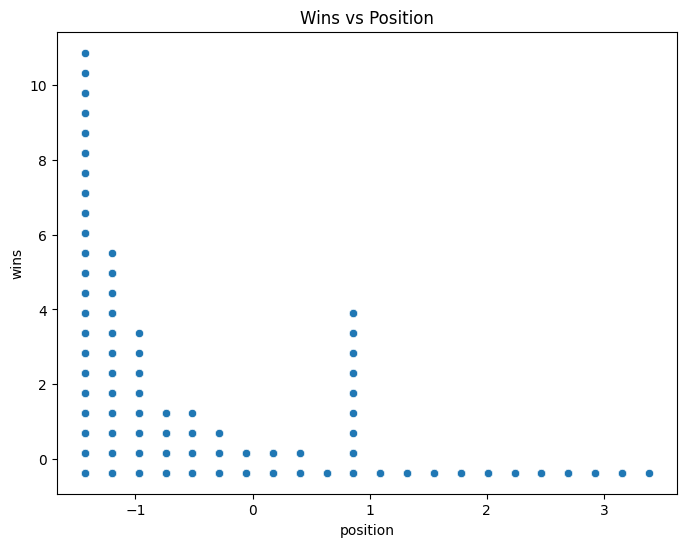

In [ ]:
# Wins vs Position
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['position'], y=df['wins'])
plt.title('Wins vs Position')
plt.show()

<ipython-input-10-53d9ecdf912c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: isinstance(x, str) and 'E' in x).any()) # Check if any cell contains 'E'
<ipython-input-10-53d9ecdf912c>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(lambda x: isinstance(x, str) and 'E' in x).any(axis=0)) # Find the column(s) with 'E'


constructorStandingsId    False
raceId                    False
constructorId             False
points                    False
position                  False
positionText               True
wins                      False
dtype: bool
constructorStandingsId    False
raceId                    False
constructorId             False
points                    False
position                  False
positionText               True
wins                      False
dtype: bool


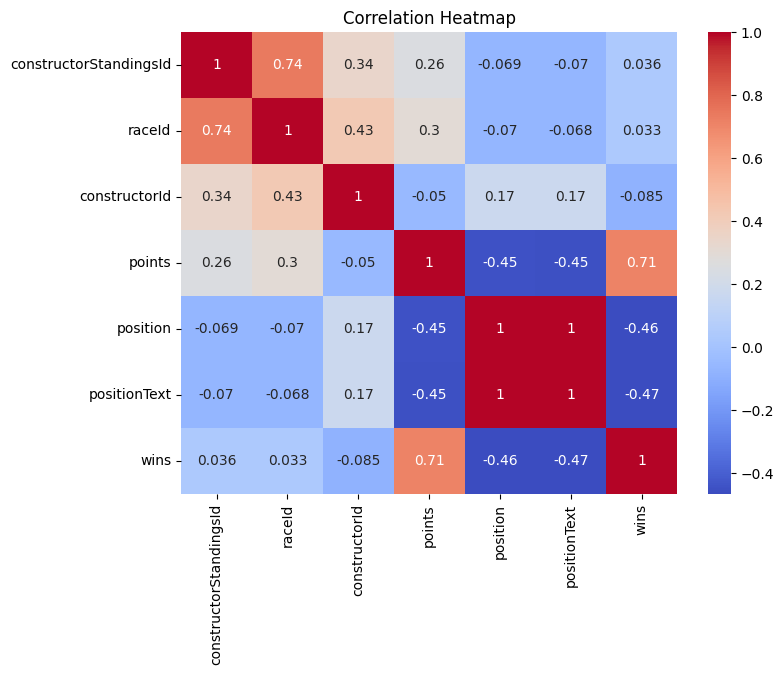

In [ ]:
# Correlation heatmap
print(df.applymap(lambda x: isinstance(x, str) and 'E' in x).any()) # Check if any cell contains 'E'
print(df.applymap(lambda x: isinstance(x, str) and 'E' in x).any(axis=0)) # Find the column(s) with 'E'
df = df.replace('E', np.nan)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4. Model Building and Training

In [ ]:
# Regression Model: Predicting Points using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Classification Model: Predicting Wins using Logistic Regression and Random Forest Classifier
logistic_model = LogisticRegression(random_state=42)
X = df[['raceId', 'constructorId', 'position']]  # Features
y_regression = df['points']  # Target for regression

# Convert y_classification to binary (0 or 1) based on whether there are wins or not
y_classification = df['wins'].apply(lambda x: 1 if x > 0 else 0) # Modified line

# Split data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)
logistic_model.fit(X_train_clf, y_train_clf)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

## 5. Model Evaluation

In [ ]:
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\nModel Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [ ]:
evaluate_classification_model(logistic_model, X_test_clf, y_test_clf)
evaluate_classification_model(rf_model, X_test_clf, y_test_clf)

def evaluate_regression_model(model, X_test, y_test):
    from sklearn.metrics import mean_squared_error, r2_score
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nRegression Model Metrics:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

evaluate_regression_model(regressor, X_test_reg, y_test_reg)


Model Metrics:
Accuracy: 0.9081
Precision: 0.7695
Recall: 0.8373
F1 Score: 0.8019

Model Metrics:
Accuracy: 0.9763
Precision: 0.9429
Recall: 0.9508
F1 Score: 0.9468

Regression Model Metrics:
Mean Squared Error: 0.1499
R^2 Score: 0.8561


## 6. Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6],
}

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy')
grid_search.fit(X_train_clf, y_train_clf)

best_rf_model = grid_search.best_estimator_
print("\nBest Parameters for Random Forest:", grid_search.best_params_)
evaluate_classification_model(best_rf_model, X_test_clf, y_test_clf)


Best Parameters for Random Forest: {'max_depth': 6, 'n_estimators': 100}

Model Metrics:
Accuracy: 0.9281
Precision: 0.8519
Recall: 0.8186
F1 Score: 0.8349


## 7. Prediction and Interpretation

In [ ]:
new_data = pd.DataFrame({'points': [25], 'position': [5], 'wins': [3]})
new_data_scaled = scaler.transform(new_data)  # Scale features like training data
classification_prediction = rf_model.predict(new_data_scaled)
regression_prediction = regressor.predict(new_data_scaled)

print("\nClassification Prediction (Wins):", classification_prediction[0])
print("Regression Prediction (Points):", regression_prediction[0])


Classification Prediction (Wins): 0
Regression Prediction (Points): -0.4305106090626797


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
